# Regressão 01 - tarefa 03 - transformações em X e Y

Carregue os pacotes necessários e a base de gorjetas.

### I. Modelo no valor da gorjeta

1. Crie a matriz de design (e a matriz y) utilizando o Patsy, para um modelo em ```tip```, explicada por ```sex, smoker, diner e net_bill```.  
2. Remova as variáveis não significantes.  
3. observe o gráfico de resíduos em função de ```net_bill```  
4. teste transformar ```net_bill``` no log e um polinômio. Escolha o melhor modelo.

In [85]:
import pandas as pd
import seaborn as sns
from seaborn import load_dataset

import matplotlib.pyplot as plt

import numpy as np

import statsmodels.api as sm
import statsmodels.formula.api as smf
import patsy

In [86]:
tips = sns.load_dataset("tips")
tips['tip_pct'] = tips['tip'] / (tips['total_bill'] - tips['tip'])
tips['net_bill'] = tips['total_bill'] - tips['tip']
tips.head()

,total_bill,tip,sex,smoker,day,time,size,tip_pct,net_bill
0,16.99,1.01,Female,No,Sun,Dinner,2,0.063204,15.98
1,10.34,1.66,Male,No,Sun,Dinner,3,0.191244,8.68
2,21.01,3.50,Male,No,Sun,Dinner,3,0.199886,17.51
3,23.68,3.31,Male,No,Sun,Dinner,2,0.162494,20.37
4,24.59,3.61,Female,No,Sun,Dinner,4,0.172069,20.98


In [87]:
y, X = patsy.dmatrices('tip ~sex + smoker + time + net_bill', tips )

In [88]:
modelo = sm.OLS(y,X).fit()

modelo.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    tip   R-squared:                       0.335
Model:                            OLS   Adj. R-squared:                  0.324
Method:                 Least Squares   F-statistic:                     30.13
Date:                Tue, 16 Apr 2024   Prob (F-statistic):           2.64e-20
Time:                        17:04:17   Log-Likelihood:                -375.13
No. Observations:                 244   AIC:                             760.3
Df Residuals:                     239   BIC:                             777.8
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
==================================================================================
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
Intercept          1.1999      0.242      4.952      0.000       0.723       1.677
sex[T.Female]     -0.0034      0.156     -0.022      0.982      -0.311       0.305
smoker[T.No]       0.1405      0.151      0.932      0.352      -0.156       0.437
time[T.Dinner]     0.0584      0.168      0.347      0.729      -0.273       0.390
net_bill           0.0995      0.009     10.662      0.000       0.081       0.118
==============================================================================
Omnibus:                       36.537   Durbin-Watson:                   2.121
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               65.875
Skew:                           0.800   Prob(JB):                     4.96e-15
Kurtosis:                       4.980   Cond. No.                         71.2
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

- ### Removendo as variáveis não significantes

In [91]:
results = smf.ols('''
                    tip ~ net_bill
                  ''', tips).fit()

results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    tip   R-squared:                       0.333
Model:                            OLS   Adj. R-squared:                  0.330
Method:                 Least Squares   F-statistic:                     120.6
Date:                Tue, 16 Apr 2024   Prob (F-statistic):           5.02e-23
Time:                        17:05:41   Log-Likelihood:                -375.63
No. Observations:                 244   AIC:                             755.3
Df Residuals:                     242   BIC:                             762.3
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      1.3307      0.168      7.907      0.000       0.999       1.662
net_bill       0.0993      0.009     10.980      0.000       0.082       0.117
==============================================================================
Omnibus:                       33.873   Durbin-Watson:                   2.123
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               59.942
Skew:                           0.754   Prob(JB):                     9.63e-14
Kurtosis:                       4.903   Cond. No.                         43.3
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

 - ### Observando o gráfico de resíduos

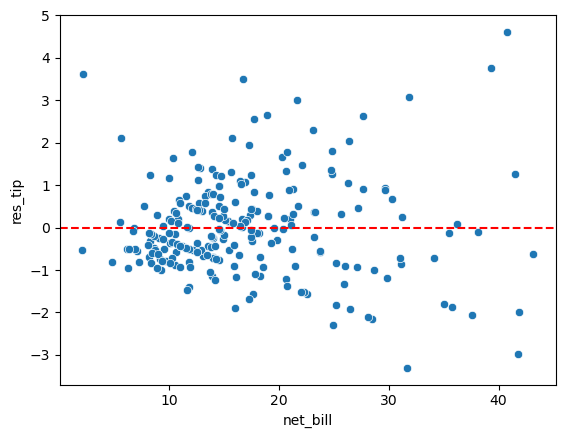

In [94]:
sns.scatterplot(x = 'net_bill', y = 'res_tip', data = tips)
plt.axhline(y=0, color='r', linestyle='--')

- ### Testando net_bill como log e polinômio para escolher o melhor modelo

In [95]:
results = smf.ols('''
                    tip ~  np.power(2,net_bill)
                  ''', tips).fit()

results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    tip   R-squared:                       0.039
Model:                            OLS   Adj. R-squared:                  0.035
Method:                 Least Squares   F-statistic:                     9.765
Date:                Tue, 16 Apr 2024   Prob (F-statistic):            0.00200
Time:                        17:05:47   Log-Likelihood:                -420.12
No. Observations:                 244   AIC:                             844.2
Df Residuals:                     242   BIC:                             851.2
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
=========================================================================================
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
Intercept                 2.9626      0.088     33.756      0.000       2.790       3.136
np.power(2, net_bill)  3.584e-13   1.15e-13      3.125      0.002    1.32e-13    5.84e-13
==============================================================================
Omnibus:                       68.466   Durbin-Watson:                   2.013
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              152.414
Skew:                           1.338   Prob(JB):                     8.01e-34
Kurtosis:                       5.798   Cond. No.                     7.72e+11
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 7.72e+11. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [96]:
tips['res_tip'] = results.resid


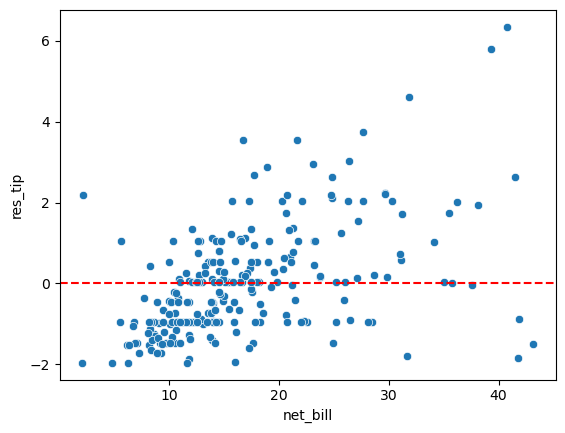

In [97]:
sns.scatterplot(x = 'net_bill', y = 'res_tip', data = tips)
plt.axhline(y=0, color='r', linestyle='--')

In [98]:
results = smf.ols('''
                    tip ~  np.log(net_bill)
                  ''', tips).fit()

results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    tip   R-squared:                       0.294
Model:                            OLS   Adj. R-squared:                  0.292
Method:                 Least Squares   F-statistic:                     101.0
Date:                Tue, 16 Apr 2024   Prob (F-statistic):           4.40e-20
Time:                        17:05:48   Log-Likelihood:                -382.40
No. Observations:                 244   AIC:                             768.8
Df Residuals:                     242   BIC:                             775.8
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
====================================================================================
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
Intercept           -1.2575      0.430     -2.924      0.004      -2.104      -0.410
np.log(net_bill)     1.5695      0.156     10.049      0.000       1.262       1.877
==============================================================================
Omnibus:                       73.945   Durbin-Watson:                   2.045
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              221.148
Skew:                           1.303   Prob(JB):                     9.51e-49
Kurtosis:                       6.868   Cond. No.                         17.9
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [99]:
tips['res_tip'] = results.resid

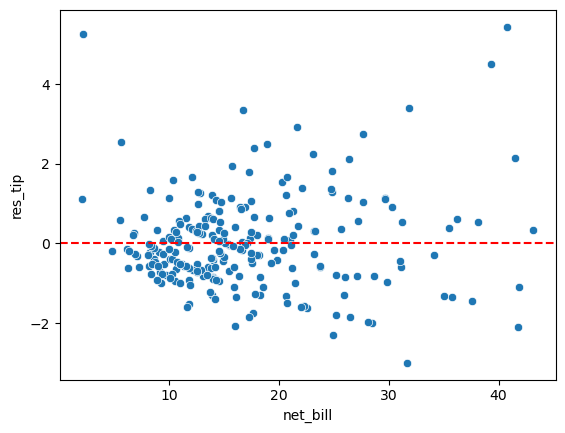

In [100]:
sns.scatterplot(x = 'net_bill', y = 'res_tip', data = tips)
plt.axhline(y=0, color='r', linestyle='--')

O melhor modelo é o primeiro que resultou em um R-quadrado de 0.33

### II. Modelo no valor do percentual da gorjeta

1. Crie a matriz de design (e a matriz y) utilizando o Patsy, para um modelo no log de ```tip_pct```, explicado por ```sex, smoker, diner e net_bill```.
2. Remova as variáveis não significantes.
3. Observe o gráfico de resíduos em função de ```net_bill```
4. Teste transformar ```net_bill``` no log e um polinômio. Escolha o melhor modelo.
5. Do modelo final deste item, calcule o $R^2$ na escala de ```tip``` (sem o log). Compare com o modelo do item 1. Qual tem melhor coeficiente de determinação?

In [116]:
results = smf.ols('''
                    tip_pct ~  sex + smoker + time + net_bill
                  ''', tips).fit()

results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                tip_pct   R-squared:                       0.107
Model:                            OLS   Adj. R-squared:                  0.092
Method:                 Least Squares   F-statistic:                     7.157
Date:                Tue, 16 Apr 2024   Prob (F-statistic):           1.85e-05
Time:                        17:16:16   Log-Likelihood:                 110.12
No. Observations:                 244   AIC:                            -210.2
Df Residuals:                     239   BIC:                            -192.8
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
==================================================================================
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
Intercept          0.3216      0.033      9.698      0.000       0.256       0.387
sex[T.Female]     -0.0069      0.021     -0.321      0.749      -0.049       0.035
smoker[T.No]      -0.0351      0.021     -1.700      0.090      -0.076       0.006
time[T.Dinner]     0.0221      0.023      0.961      0.337      -0.023       0.067
net_bill          -0.0066      0.001     -5.191      0.000      -0.009      -0.004
==============================================================================
Omnibus:                      461.972   Durbin-Watson:                   2.032
Prob(Omnibus):                  0.000   Jarque-Bera (JB):           218184.236
Skew:                          10.789   Prob(JB):                         0.00
Kurtosis:                     147.897   Cond. No.                         71.2
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [117]:
results = smf.ols('''
                    tip_pct ~  net_bill
                  ''', tips).fit()

results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                tip_pct   R-squared:                       0.091
Model:                            OLS   Adj. R-squared:                  0.088
Method:                 Least Squares   F-statistic:                     24.31
Date:                Tue, 16 Apr 2024   Prob (F-statistic):           1.52e-06
Time:                        17:16:16   Log-Likelihood:                 108.00
No. Observations:                 244   AIC:                            -212.0
Df Residuals:                     242   BIC:                            -205.0
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      0.3053      0.023     13.166      0.000       0.260       0.351
net_bill      -0.0061      0.001     -4.931      0.000      -0.009      -0.004
==============================================================================
Omnibus:                      468.674   Durbin-Watson:                   1.987
Prob(Omnibus):                  0.000   Jarque-Bera (JB):           234437.604
Skew:                          11.104   Prob(JB):                         0.00
Kurtosis:                     153.221   Cond. No.                         43.3
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [118]:
tips['res_tip'] = results.resid

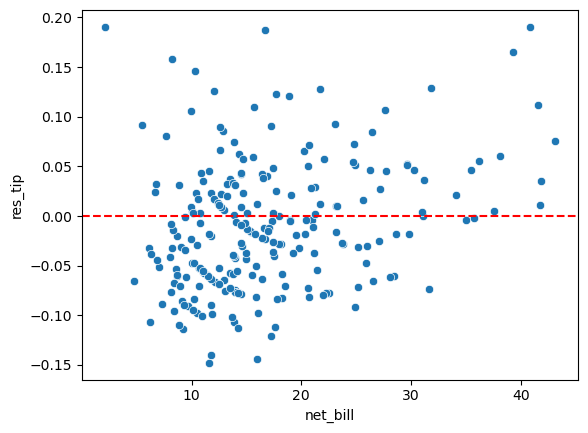

In [119]:
sns.scatterplot(x = 'net_bill', y = 'res_tip', data = tips[tips['tip_pct']<.5])
plt.axhline(y=0, color='r', linestyle='--')

In [120]:
results = smf.ols('''
                    tip_pct ~  np.power(2,net_bill)
                  ''', tips).fit()

results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                tip_pct   R-squared:                       0.004
Model:                            OLS   Adj. R-squared:                  0.000
Method:                 Least Squares   F-statistic:                     1.028
Date:                Tue, 16 Apr 2024   Prob (F-statistic):              0.312
Time:                        17:16:17   Log-Likelihood:                 96.839
No. Observations:                 244   AIC:                            -189.7
Df Residuals:                     242   BIC:                            -182.7
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
=========================================================================================
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
Intercept                 0.2035      0.011     19.293      0.000       0.183       0.224
np.power(2, net_bill) -1.398e-14   1.38e-14     -1.014      0.312   -4.11e-14    1.32e-14
==============================================================================
Omnibus:                      465.571   Durbin-Watson:                   2.040
Prob(Omnibus):                  0.000   Jarque-Bera (JB):           224868.560
Skew:                          10.963   Prob(JB):                         0.00
Kurtosis:                     150.097   Cond. No.                     7.72e+11
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 7.72e+11. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [121]:
results = smf.ols('''
                    tip_pct ~  np.log(net_bill)
                  ''', tips).fit()

results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                tip_pct   R-squared:                       0.202
Model:                            OLS   Adj. R-squared:                  0.198
Method:                 Least Squares   F-statistic:                     61.16
Date:                Tue, 16 Apr 2024   Prob (F-statistic):           1.62e-13
Time:                        17:16:18   Log-Likelihood:                 123.81
No. Observations:                 244   AIC:                            -243.6
Df Residuals:                     242   BIC:                            -236.6
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
====================================================================================
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
Intercept            0.6181      0.054     11.444      0.000       0.512       0.724
np.log(net_bill)    -0.1534      0.020     -7.820      0.000      -0.192      -0.115
==============================================================================
Omnibus:                      440.899   Durbin-Watson:                   1.965
Prob(Omnibus):                  0.000   Jarque-Bera (JB):           171509.052
Skew:                           9.850   Prob(JB):                         0.00
Kurtosis:                     131.381   Cond. No.                         17.9
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [122]:
tips['res_tip'] = results.resid

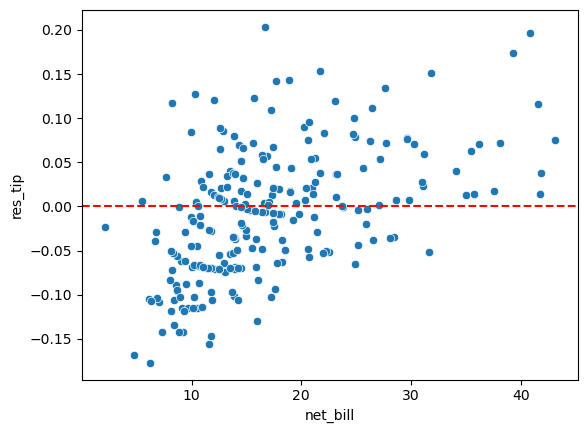

In [123]:
sns.scatterplot(x = 'net_bill', y = 'res_tip', data = tips[tips['tip_pct']<.5])
plt.axhline(y=0, color='r', linestyle='--')

O melhor modelo é o com net_bill como log.

### III. Previsão de renda

Vamos trabalhar a base que você vai usar no projeto do final deste ciclo.

Carregue a base ```previsao_de_renda.csv```.

|variavel|descrição|
|-|-|
|data_ref                | Data de referência de coleta das variáveis |
|index                   | Código de identificação do cliente|
|sexo                    | Sexo do cliente|
|posse_de_veiculo        | Indica se o cliente possui veículo|
|posse_de_imovel         | Indica se o cliente possui imóvel|
|qtd_filhos              | Quantidade de filhos do cliente|
|tipo_renda              | Tipo de renda do cliente|
|educacao                | Grau de instrução do cliente|
|estado_civil            | Estado civil do cliente|
|tipo_residencia         | Tipo de residência do cliente (própria, alugada etc)|
|idade                   | Idade do cliente|
|tempo_emprego           | Tempo no emprego atual|
|qt_pessoas_residencia   | Quantidade de pessoas que moram na residência|
|renda                   | Renda em reais|

1. Ajuste um modelo de regressão linear simples para explicar ```renda``` como variável resposta, por ```tempo_emprego``` como variável explicativa. Observe que há muitas observações nessa tabela. Utilize os recursos que achar necessário.
2. Faça uma análise de resíduos. Com os recursos vistos neste módulo, como você melhoraria esta regressão?
3. Ajuste um modelo de regressão linear múltipla para explicar ```renda``` (ou uma transformação de ```renda```) de acordo com as demais variáveis.
4. Remova as variáveis não significantes e ajuste novamente o modelo. Interprete os parâmetros
5. Faça uma análise de resíduos. Avalie a qualidade do ajuste.

In [147]:
prev_renda = pd.read_csv('previsao_de_renda.csv')

In [148]:
results = smf.ols('''
                    renda ~  tempo_emprego
                  ''', prev_renda).fit()

results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  renda   R-squared:                       0.155
Model:                            OLS   Adj. R-squared:                  0.155
Method:                 Least Squares   F-statistic:                     2294.
Date:                Tue, 16 Apr 2024   Prob (F-statistic):               0.00
Time:                        18:51:53   Log-Likelihood:            -1.2249e+05
No. Observations:               12466   AIC:                         2.450e+05
Df Residuals:                   12464   BIC:                         2.450e+05
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
=================================================================================
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
Intercept      2653.9453     60.924     43.561      0.000    2534.525    2773.366
tempo_emprego   283.3509      5.916     47.892      0.000     271.754     294.948
==============================================================================
Omnibus:                     9974.393   Durbin-Watson:                   2.016
Prob(Omnibus):                  0.000   Jarque-Bera (JB):           387626.996
Skew:                           3.561   Prob(JB):                         0.00
Kurtosis:                      29.373   Cond. No.                         15.7
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [128]:
prev_renda['res_renda'] = results.resid

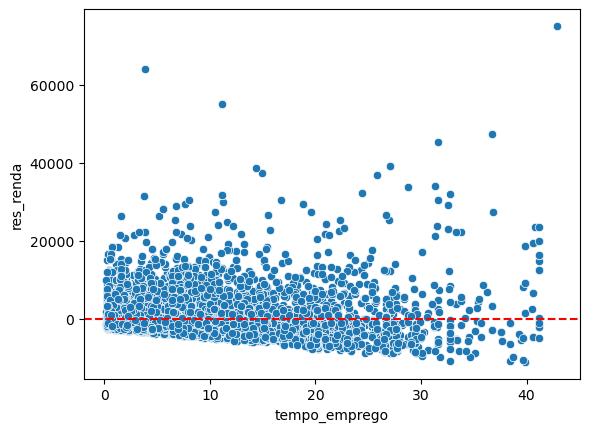

In [129]:
sns.scatterplot(x = 'tempo_emprego', y = 'res_renda', data = prev_renda)
plt.axhline(y=0, color='r', linestyle='--')

In [144]:
results = smf.ols('''
                    np.log(renda) ~  tempo_emprego
                  ''', prev_renda).fit()

results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:          np.log(renda)   R-squared:                       0.144
Model:                            OLS   Adj. R-squared:                  0.144
Method:                 Least Squares   F-statistic:                     2098.
Date:                Tue, 16 Apr 2024   Prob (F-statistic):               0.00
Time:                        18:51:41   Log-Likelihood:                -13960.
No. Observations:               12466   AIC:                         2.792e+04
Df Residuals:                   12464   BIC:                         2.794e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
=================================================================================
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
Intercept         7.8074      0.010    774.002      0.000       7.788       7.827
tempo_emprego     0.0449      0.001     45.802      0.000       0.043       0.047
==============================================================================
Omnibus:                        3.082   Durbin-Watson:                   2.016
Prob(Omnibus):                  0.214   Jarque-Bera (JB):                3.050
Skew:                           0.034   Prob(JB):                        0.218
Kurtosis:                       3.037   Cond. No.                         15.7
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [145]:
prev_renda['res_renda'] = results.resid

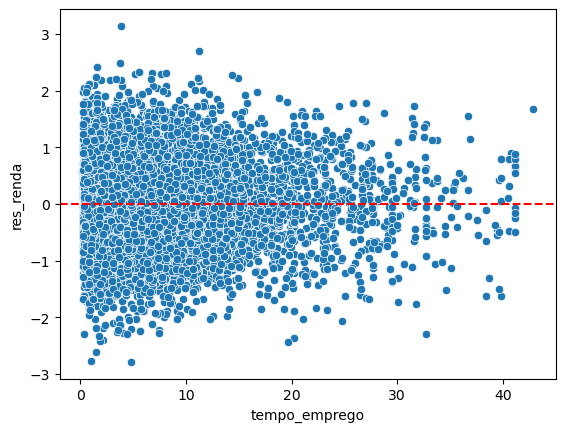

In [146]:
sns.scatterplot(x = 'tempo_emprego', y = 'res_renda', data = prev_renda)
plt.axhline(y=0, color='r', linestyle='--')

 - #### Ajuste um modelo de regressão linear múltipla para explicar renda (ou uma transformação de renda) de acordo com as demais variáveis.

In [151]:
prev_renda.columns

Index(['Unnamed: 0', 'data_ref', 'index', 'sexo', 'posse_de_veiculo',
       'posse_de_imovel', 'qtd_filhos', 'tipo_renda', 'educacao',
       'estado_civil', 'tipo_residencia', 'idade', 'tempo_emprego',
       'qt_pessoas_residencia', 'mau', 'renda'],
      dtype='object')

In [157]:
results = smf.ols('''
                    renda ~  tempo_emprego 
                    + qt_pessoas_residencia + 
                    posse_de_veiculo + 
                    posse_de_imovel + 
                    qtd_filhos + 
                    sexo + 
                    educacao +
                    tipo_renda +
                    estado_civil +
                    tipo_residencia +
                    idade +
                    qt_pessoas_residencia
                  ''', prev_renda).fit()

results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  renda   R-squared:                       0.221
Model:                            OLS   Adj. R-squared:                  0.219
Method:                 Least Squares   F-statistic:                     146.9
Date:                Tue, 16 Apr 2024   Prob (F-statistic):               0.00
Time:                        18:57:29   Log-Likelihood:            -1.2199e+05
No. Observations:               12466   AIC:                         2.440e+05
Df Residuals:                   12441   BIC:                         2.442e+05
Df Model:                          24                                         
Covariance Type:            nonrobust                                         
====================================================================================================
                                       coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------------------
Intercept                         -271.2003   1674.811     -0.162      0.871   -3554.089    3011.688
posse_de_veiculo[T.True]           -79.1270     84.709     -0.934      0.350    -245.169      86.915
posse_de_imovel[T.True]            349.0015     83.426      4.183      0.000     185.473     512.530
sexo[T.M]                         2366.1922     88.099     26.858      0.000    2193.505    2538.879
educacao[T.Pós graduação]         2207.5583   1081.061      2.042      0.041      88.511    4326.606
educacao[T.Secundário]            -241.1964    437.786     -0.551      0.582   -1099.324     616.931
educacao[T.Superior completo]      338.2616    439.622      0.769      0.442    -523.465    1199.988
educacao[T.Superior incompleto]   -296.2056    470.976     -0.629      0.529   -1219.392     626.981
tipo_renda[T.Bolsista]            -817.4651   2155.323     -0.379      0.704   -5042.231    3407.301
tipo_renda[T.Empresário]          1021.9116     90.142     11.337      0.000     845.219    1198.605
tipo_renda[T.Pensionista]         1725.6132   1437.300      1.201      0.230   -1091.716    4542.943
tipo_renda[T.Servidor público]     436.9668    130.511      3.348      0.001     181.145     692.788
estado_civil[T.Separado]           141.9156    806.277      0.176      0.860   -1438.512    1722.343
estado_civil[T.Solteiro]           376.1573    791.461      0.475      0.635   -1175.228    1927.542
estado_civil[T.União]              -41.0497    143.754     -0.286      0.775    -322.829     240.730
estado_civil[T.Viúvo]              -41.1125    827.976     -0.050      0.960   -1664.073    1581.848
tipo_residencia[T.Casa]           -356.2809    328.620     -1.084      0.278   -1000.428     287.866
tipo_residencia[T.Com os pais]    -640.8115    368.489     -1.739      0.082   -1363.106      81.483
tipo_residencia[T.Comunitário]    -577.7117    634.059     -0.911      0.362   -1820.565     665.142
tipo_residencia[T.Estúdio]        -976.1765    547.353     -1.783      0.075   -2049.073      96.720
tipo_residencia[T.Governamental]  -883.1863    397.273     -2.223      0.026   -1661.903    -104.470
tempo_emprego                      299.3338      6.140     48.750      0.000     287.298     311.369
qt_pessoas_residencia              306.2508    787.902      0.389      0.698   -1238.159    1850.661
qtd_filhos                        -240.3254    789.406     -0.304      0.761   -1787.683    1307.032
idade                               29.8746      4.808      6.213      0.000      20.450      39.299
==============================================================================
Omnibus:                    10075.335   Durbin-Watson:                   2.016
Prob(Omnibus):                  0.000   Jarque-Bera (JB):           432391.441
Skew:             

- Retirando as variáveis não significativas

In [154]:
results = smf.ols('''
                    renda ~  tempo_emprego 
                    + qt_pessoas_residencia +  
                    posse_de_imovel + 
                    sexo + 
                    educacao +
                    tipo_renda +
                    tipo_residencia +
                    idade
                  ''', prev_renda).fit()

results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  renda   R-squared:                       0.221
Model:                            OLS   Adj. R-squared:                  0.219
Method:                 Least Squares   F-statistic:                     195.7
Date:                Tue, 16 Apr 2024   Prob (F-statistic):               0.00
Time:                        18:56:30   Log-Likelihood:            -1.2199e+05
No. Observations:               12466   AIC:                         2.440e+05
Df Residuals:                   12447   BIC:                         2.442e+05
Df Model:                          18                                         
Covariance Type:            nonrobust                                         
====================================================================================================
                                       coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------------------
Intercept                          278.0599    581.678      0.478      0.633    -862.120    1418.240
posse_de_imovel[T.True]            351.8099     83.261      4.225      0.000     188.606     515.013
sexo[T.M]                         2349.8177     82.570     28.458      0.000    2187.967    2511.668
educacao[T.Pós graduação]         2233.5904   1079.874      2.068      0.039     116.870    4350.311
educacao[T.Secundário]            -228.5816    437.304     -0.523      0.601   -1085.765     628.602
educacao[T.Superior completo]      342.8353    438.836      0.781      0.435    -517.350    1203.021
educacao[T.Superior incompleto]   -281.2362    470.399     -0.598      0.550   -1203.292     640.819
tipo_renda[T.Bolsista]            -775.4981   2154.668     -0.360      0.719   -4998.980    3447.984
tipo_renda[T.Empresário]          1024.2657     89.954     11.387      0.000     847.942    1200.590
tipo_renda[T.Pensionista]         1759.8312   1436.895      1.225      0.221   -1056.705    4576.367
tipo_renda[T.Servidor público]     437.8954    130.459      3.357      0.001     182.176     693.615
tipo_residencia[T.Casa]           -373.6169    328.377     -1.138      0.255   -1017.286     270.052
tipo_residencia[T.Com os pais]    -654.8971    368.202     -1.779      0.075   -1376.630      66.836
tipo_residencia[T.Comunitário]    -609.9331    633.674     -0.963      0.336   -1852.033     632.166
tipo_residencia[T.Estúdio]        -994.3260    547.088     -1.817      0.069   -2066.703      78.051
tipo_residencia[T.Governamental]  -894.5207    397.137     -2.252      0.024   -1672.971    -116.071
tempo_emprego                      299.9539      6.129     48.944      0.000     287.941     311.967
qt_pessoas_residencia               51.8272     42.140      1.230      0.219     -30.775     134.429
idade                               28.3244      4.658      6.081      0.000      19.195      37.454
==============================================================================
Omnibus:                    10073.343   Durbin-Watson:                   2.016
Prob(Omnibus):                  0.000   Jarque-Bera (JB):           432169.454
Skew:                           3.578   Prob(JB):                         0.00
Kurtosis:                      30.943   Cond. No.                     2.38e+03
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 2.38e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

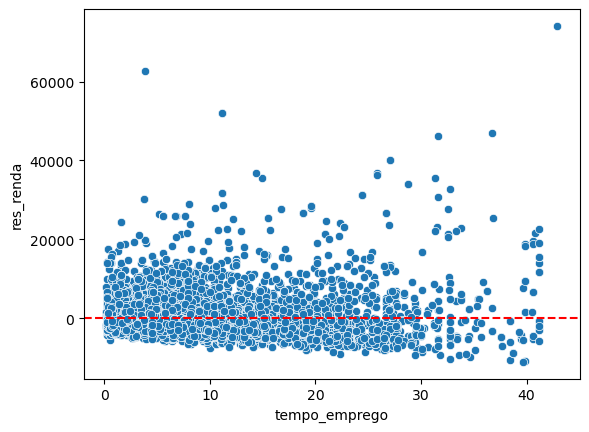

In [158]:
prev_renda['res_renda'] = results.resid
sns.scatterplot(x = 'tempo_emprego', y = 'res_renda', data = prev_renda)
plt.axhline(y=0, color='r', linestyle='--')

Esse foi o melhor ajuste que encontrei, porém os resíduos começam a desperçar quanto maior o tempo de emprego